In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV 
from scipy.stats import randint
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

### Pre-processing

In [2]:
# Reading the Training Data
df = pd.read_csv("/kaggle/input/stroke-training-dataset/stroke_train_set.csv")

In [3]:
# 1. Displaying the first 10 records
df.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,47.0,0,0,Yes,Private,Urban,63.98,26.8,smokes,0
1,Male,54.0,0,0,Yes,Private,Urban,86.26,35.1,formerly smoked,0
2,Female,3.0,0,0,No,children,Rural,68.34,18.0,Unknown,0
3,Female,62.0,0,0,Yes,Private,Rural,226.38,47.4,never smoked,0
4,Female,27.0,0,0,Yes,Private,Rural,85.60,21.4,Unknown,0
5,Male,39.0,0,0,Yes,Private,Urban,164.67,33.8,Unknown,0
6,Female,47.0,0,0,Yes,Private,Rural,195.04,45.5,never smoked,0
7,Male,1.8,0,0,No,children,Urban,153.31,17.1,Unknown,0
8,Male,41.0,0,0,Yes,Private,Urban,104.34,30.3,Unknown,0
9,Female,47.0,0,0,Yes,Private,Urban,68.48,21.3,never smoked,0


In [4]:
## Finding out the number of 
records = df.shape[0]
fields = df.shape[1]
print('The total number of records are:', records)
print("The total number of features in the dataset:", fields)

The total number of records are: 4088
The total number of features in the dataset: 11


In [5]:
# 2. Check dataset info - field types, non-null values, dtypes
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  162
smoking_status         0
stroke                 0
dtype: int64

# Hence we can clearly see that the number of missing values in the field of BMI is too small as compared to the entire dataset 162/4088 records => approx 4% of the enitre dataset, we can actually consider to the drop those empty records entirely going by the principle of Ocam's Razor

In [6]:
df1 = df.copy(deep = True)

In [7]:
# 3a. Pre-processing (Cleaning): Address missing (NULL) values - drop or imputation
df1['bmi'].fillna(df1['bmi'].mean(), inplace=True)
## although by default its set to False i still mentioned because I dont want to touch the original dataset
df1   

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,47.0,0,0,Yes,Private,Urban,63.98,26.8,smokes,0
1,Male,54.0,0,0,Yes,Private,Urban,86.26,35.1,formerly smoked,0
2,Female,3.0,0,0,No,children,Rural,68.34,18.0,Unknown,0
3,Female,62.0,0,0,Yes,Private,Rural,226.38,47.4,never smoked,0
4,Female,27.0,0,0,Yes,Private,Rural,85.60,21.4,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
4083,Male,79.0,0,0,Yes,Private,Rural,69.34,29.0,never smoked,0
4084,Male,55.0,0,0,Yes,Self-employed,Rural,163.82,27.5,never smoked,0
4085,Male,33.0,0,0,Yes,Private,Urban,105.19,50.1,smokes,0
4086,Male,34.0,0,0,Yes,Private,Urban,85.57,26.8,Unknown,0


In [8]:
df1.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,47.0,0,0,Yes,Private,Urban,63.98,26.8,smokes,0
1,Male,54.0,0,0,Yes,Private,Urban,86.26,35.1,formerly smoked,0
2,Female,3.0,0,0,No,children,Rural,68.34,18.0,Unknown,0
3,Female,62.0,0,0,Yes,Private,Rural,226.38,47.4,never smoked,0
4,Female,27.0,0,0,Yes,Private,Rural,85.60,21.4,Unknown,0
5,Male,39.0,0,0,Yes,Private,Urban,164.67,33.8,Unknown,0
6,Female,47.0,0,0,Yes,Private,Rural,195.04,45.5,never smoked,0
7,Male,1.8,0,0,No,children,Urban,153.31,17.1,Unknown,0
8,Male,41.0,0,0,Yes,Private,Urban,104.34,30.3,Unknown,0
9,Female,47.0,0,0,Yes,Private,Urban,68.48,21.3,never smoked,0


In [9]:
df1.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

4088 - 3926 = 162. Hence we can see that all the records for the missing values of the BMI field have been deleted

In [10]:
df1.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

As expected after getting rid of all the empty records we are free to 

In [11]:
# 3b. Pre-processing (Cleaning): Remove Duplicate Rows
df1 = df1.drop_duplicates() 

df1.shape


(4088, 11)

The number of records after doing the operation drop_duplicates() is still 3926, which means there where no duplicate values present in the dataframe

## Lets visualize the categorical and numerical data seperately so we get a clear cut understanding of what kind of a data we are dealing with and how to deal with it

In [12]:
categorical_cols = df.select_dtypes(exclude = np.number).columns
categorical_cols

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

# 4b. Data understanding - Make use of plots to build more understanding of the data
# Hint: Can use df.plot()

## Now lets say we want to visualize the categorical features and numerical fetures seperately
## what we can do is the seperate out the categorical data and the numerical data seperately 

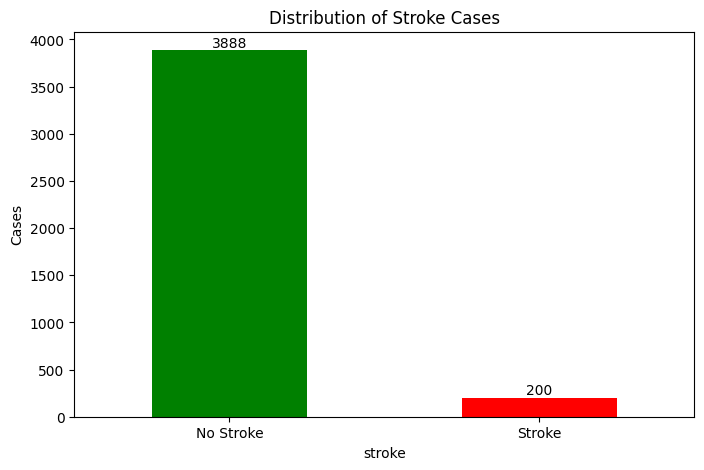

In [20]:
plt.figure(figsize = (8,5))
#output_feature = df['stroke'].value_counts().plot(kind = 'bar')
#ax = df['stroke'].value_counts().plot(kind = 'bar')
#for i in ax.containers:
#    ax.bar_label(i)
#plt.show()

# Plot the bar chart
ax = df['stroke'].value_counts().plot(kind='bar', color=['Green', 'Red'])

# Add y-axis label
ax.set_ylabel('Cases')

# Divide the x-axis into two parts
ax.set_xticks([0, 1])
ax.set_xticklabels(['No Stroke', 'Stroke'], rotation=0)

# Add data labels on top of the bars
for i in ax.containers:
    ax.bar_label(i, fmt='%d', label_type='edge')

plt.title('Distribution of Stroke Cases')
plt.show()

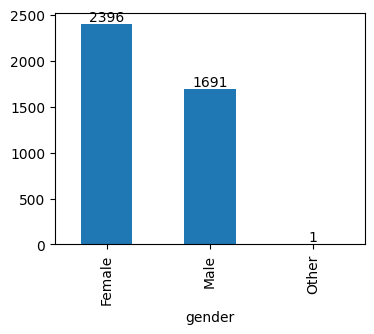

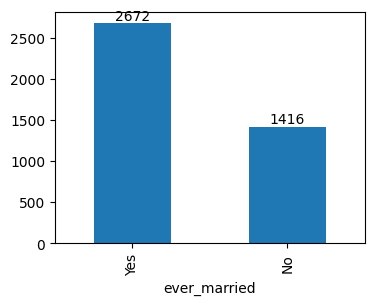

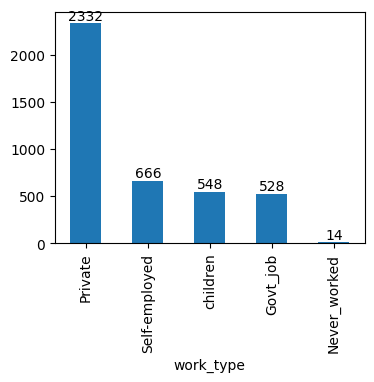

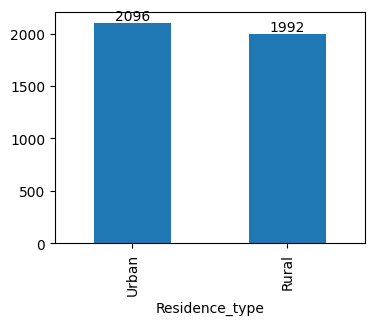

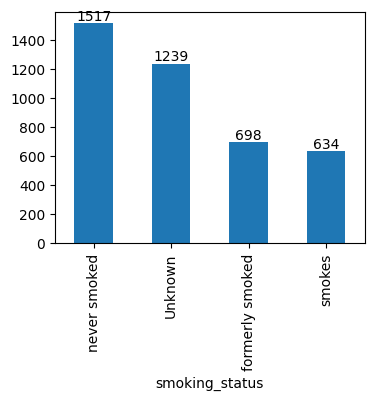

In [13]:
for col in categorical_cols:
    plt.figure(figsize=(4,3))
    ax = df[col].value_counts().plot(kind = 'bar')
    for i in ax.containers:
        ax.bar_label(i)
    plt.show()

In [14]:
numerical_cols = df.select_dtypes(include = np.number).columns
numerical_cols

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke'],
      dtype='object')

In [198]:
numerical_columns = ['age','avg_glucose_level','bmi']

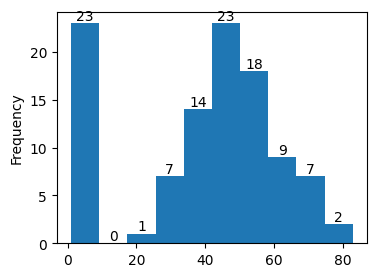

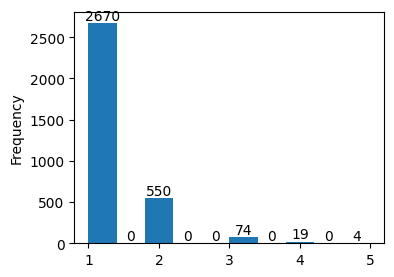

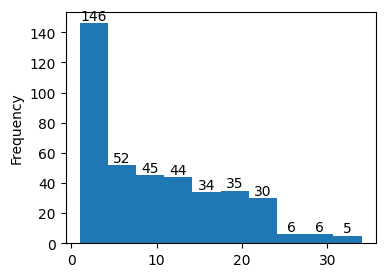

In [199]:
for col in numerical_columns:
    plt.figure(figsize=(4,3))
    ax = df[col].value_counts().plot(kind = 'hist')
    for i in ax.containers:
        ax.bar_label(i)
    plt.show()

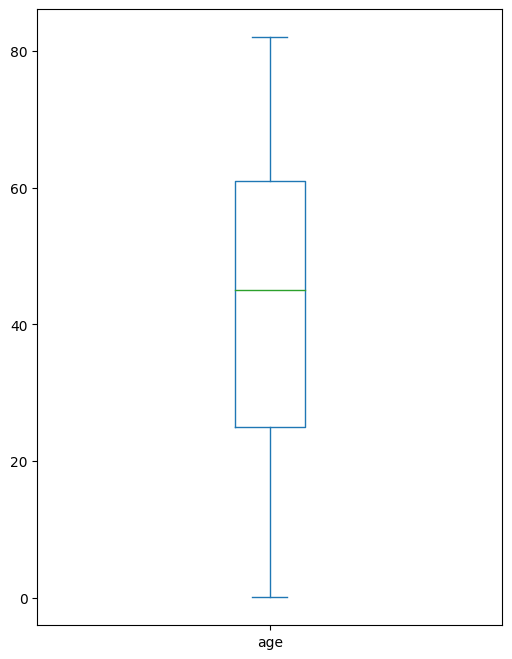

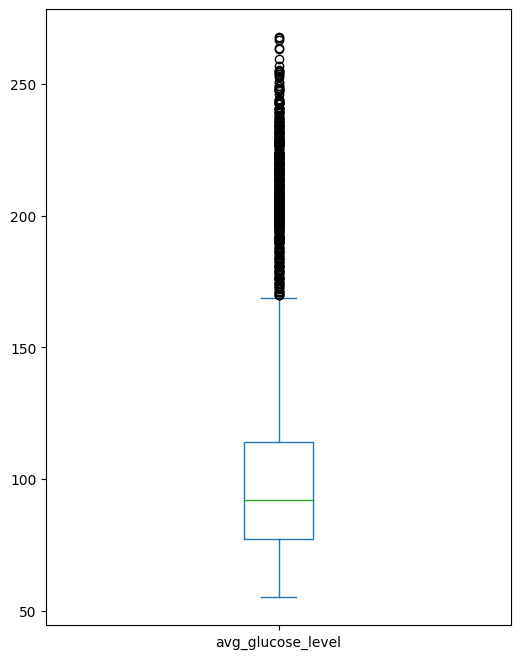

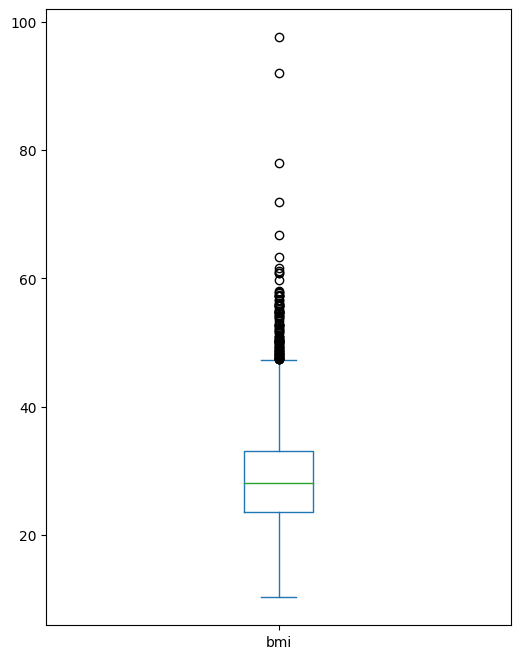

In [200]:
#A boxplot provides a visual summary of the central tendency, spread, and skewness of the data.
#It displays key statistics such as the median, quartiles, and potential outliers.
for col in numerical_columns:
    plt.figure(figsize=(6,8))
    ax = df[col].plot(kind = 'box')
    for i in ax.containers:
        ax.bar_label(i)
    plt.show()

## Since features like BMI, age and avg_glucose_level are continuous and tend to be dense, so better way of visualizign them are through Histogram

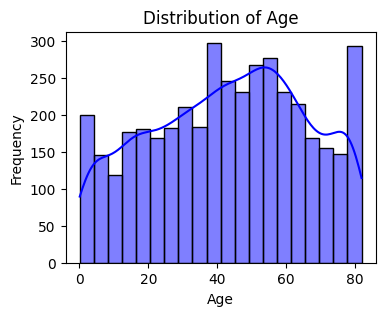

In [201]:
# plotting the age histogram to get to see the age distribution
plt.figure(figsize=(4,3))
sns.histplot(df['age'], bins=20, kde=True, color='blue')  # Adjust the number of bins as needed
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

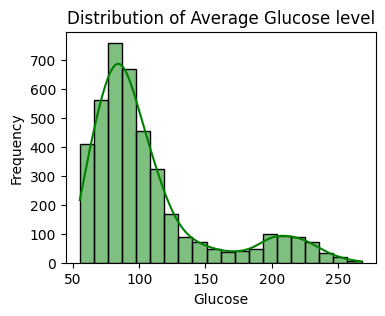

In [202]:
plt.figure(figsize=(4,3))
sns.histplot(df['avg_glucose_level'], bins=20, kde=True, color='green')  # Adjust the number of bins as needed
plt.title('Distribution of Average Glucose level')
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.show()

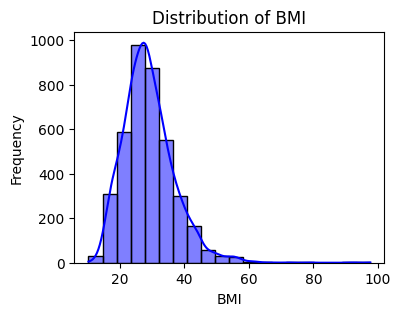

In [203]:
plt.figure(figsize=(4, 3))
sns.histplot(df['bmi'], bins=20, kde=True, color='blue')  # Adjust the number of bins as needed
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

In [204]:
# 3c. Pre-processing (Cleaning): Drop irrelevant columns (that you don't want to give as input to the model)
#df1 = df1.drop(columns=["ever_married"])
## the rationale behind this step is that the fact of having a stroke or not seems to be absolutely independant of the persons marital status
#df1.shape
## marital staus would have been an unnecessary feature weighing the model down with unwanted complexity

In [205]:
df1['work_type'].value_counts()

work_type
Private          2332
Self-employed     666
children          548
Govt_job          528
Never_worked       14
Name: count, dtype: int64

In [206]:
# 3d. Pre-processing (Encoding): Convert categorical values to numeric
# Use df['col_name'].value_counts() to find out all the categories available per column

df1 = pd.get_dummies(data = df1, columns = ['work_type'], dtype = int) 
# Pandas function to convert 'objects' (categorical) to one-hot (new col per category)
## Here we also mention the datatype = int so that it otherwise would have returned boolean values
df1

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,Male,47.0,0,0,Yes,Urban,63.98,26.8,smokes,0,0,0,1,0,0
1,Male,54.0,0,0,Yes,Urban,86.26,35.1,formerly smoked,0,0,0,1,0,0
2,Female,3.0,0,0,No,Rural,68.34,18.0,Unknown,0,0,0,0,0,1
3,Female,62.0,0,0,Yes,Rural,226.38,47.4,never smoked,0,0,0,1,0,0
4,Female,27.0,0,0,Yes,Rural,85.60,21.4,Unknown,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4083,Male,79.0,0,0,Yes,Rural,69.34,29.0,never smoked,0,0,0,1,0,0
4084,Male,55.0,0,0,Yes,Rural,163.82,27.5,never smoked,0,0,0,0,1,0
4085,Male,33.0,0,0,Yes,Urban,105.19,50.1,smokes,0,0,0,1,0,0
4086,Male,34.0,0,0,Yes,Urban,85.57,26.8,Unknown,0,0,0,1,0,0


Now as we can see that the number of columns have increased due to the conversion of work_type from categorical to numerical

In [207]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4088 entries, 0 to 4087
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gender                   4088 non-null   object 
 1   age                      4088 non-null   float64
 2   hypertension             4088 non-null   int64  
 3   heart_disease            4088 non-null   int64  
 4   ever_married             4088 non-null   object 
 5   Residence_type           4088 non-null   object 
 6   avg_glucose_level        4088 non-null   float64
 7   bmi                      4088 non-null   float64
 8   smoking_status           4088 non-null   object 
 9   stroke                   4088 non-null   int64  
 10  work_type_Govt_job       4088 non-null   int64  
 11  work_type_Never_worked   4088 non-null   int64  
 12  work_type_Private        4088 non-null   int64  
 13  work_type_Self-employed  4088 non-null   int64  
 14  work_type_children      

In [208]:
df1[df1['gender'] == 'Other']

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
1631,Other,26.0,0,0,No,Rural,143.33,22.4,formerly smoked,0,0,0,1,0,0


In [209]:
df1['gender'].value_counts()

gender
Female    2396
Male      1691
Other        1
Name: count, dtype: int64

In [210]:
df['ever_married'] = df['ever_married'].map({'Yes': 1, 'No': 0})
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,47.0,0,0,1,Private,Urban,63.98,26.8,smokes,0
1,Male,54.0,0,0,1,Private,Urban,86.26,35.1,formerly smoked,0
2,Female,3.0,0,0,0,children,Rural,68.34,18.0,Unknown,0
3,Female,62.0,0,0,1,Private,Rural,226.38,47.4,never smoked,0
4,Female,27.0,0,0,1,Private,Rural,85.60,21.4,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
4083,Male,79.0,0,0,1,Private,Rural,69.34,29.0,never smoked,0
4084,Male,55.0,0,0,1,Self-employed,Rural,163.82,27.5,never smoked,0
4085,Male,33.0,0,0,1,Private,Urban,105.19,50.1,smokes,0
4086,Male,34.0,0,0,1,Private,Urban,85.57,26.8,Unknown,0


In [211]:
df['ever_married'].corr(df['stroke'])

0.11267381114205997

In [212]:
df1['Residence_type'].value_counts()

Residence_type
Urban    2096
Rural    1992
Name: count, dtype: int64

Since there is only 1 outlier in terms of gender type in form of 'Others' in the gender feature we can neglect it as a part of larger interest and model simplification, but this couldn't have been done if the number of instances of the the "Other" was high.

In [213]:
df1.drop(1631, inplace = True)

In [214]:
df1['gender'].value_counts()

gender
Female    2396
Male      1691
Name: count, dtype: int64

In [215]:
df1 = pd.get_dummies(df1, columns=['gender'], drop_first=True, dtype=int)
df1

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,gender_Male
0,47.0,0,0,Yes,Urban,63.98,26.8,smokes,0,0,0,1,0,0,1
1,54.0,0,0,Yes,Urban,86.26,35.1,formerly smoked,0,0,0,1,0,0,1
2,3.0,0,0,No,Rural,68.34,18.0,Unknown,0,0,0,0,0,1,0
3,62.0,0,0,Yes,Rural,226.38,47.4,never smoked,0,0,0,1,0,0,0
4,27.0,0,0,Yes,Rural,85.60,21.4,Unknown,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4083,79.0,0,0,Yes,Rural,69.34,29.0,never smoked,0,0,0,1,0,0,1
4084,55.0,0,0,Yes,Rural,163.82,27.5,never smoked,0,0,0,0,1,0,1
4085,33.0,0,0,Yes,Urban,105.19,50.1,smokes,0,0,0,1,0,0,1
4086,34.0,0,0,Yes,Urban,85.57,26.8,Unknown,0,0,0,1,0,0,1


In [216]:
df1 = pd.get_dummies(df1, columns=['smoking_status'], dtype=int)
df1

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,gender_Male,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,47.0,0,0,Yes,Urban,63.98,26.8,0,0,0,1,0,0,1,0,0,0,1
1,54.0,0,0,Yes,Urban,86.26,35.1,0,0,0,1,0,0,1,0,1,0,0
2,3.0,0,0,No,Rural,68.34,18.0,0,0,0,0,0,1,0,1,0,0,0
3,62.0,0,0,Yes,Rural,226.38,47.4,0,0,0,1,0,0,0,0,0,1,0
4,27.0,0,0,Yes,Rural,85.60,21.4,0,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4083,79.0,0,0,Yes,Rural,69.34,29.0,0,0,0,1,0,0,1,0,0,1,0
4084,55.0,0,0,Yes,Rural,163.82,27.5,0,0,0,0,1,0,1,0,0,1,0
4085,33.0,0,0,Yes,Urban,105.19,50.1,0,0,0,1,0,0,1,0,0,0,1
4086,34.0,0,0,Yes,Urban,85.57,26.8,0,0,0,1,0,0,1,1,0,0,0


In [217]:
df1 = pd.get_dummies(df1, columns=['Residence_type'], drop_first=True, dtype=int)
df1

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,gender_Male,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,Residence_type_Urban
0,47.0,0,0,Yes,63.98,26.8,0,0,0,1,0,0,1,0,0,0,1,1
1,54.0,0,0,Yes,86.26,35.1,0,0,0,1,0,0,1,0,1,0,0,1
2,3.0,0,0,No,68.34,18.0,0,0,0,0,0,1,0,1,0,0,0,0
3,62.0,0,0,Yes,226.38,47.4,0,0,0,1,0,0,0,0,0,1,0,0
4,27.0,0,0,Yes,85.60,21.4,0,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4083,79.0,0,0,Yes,69.34,29.0,0,0,0,1,0,0,1,0,0,1,0,0
4084,55.0,0,0,Yes,163.82,27.5,0,0,0,0,1,0,1,0,0,1,0,0
4085,33.0,0,0,Yes,105.19,50.1,0,0,0,1,0,0,1,0,0,0,1,1
4086,34.0,0,0,Yes,85.57,26.8,0,0,0,1,0,0,1,1,0,0,0,1


The agenda behind dropping one of those values was to eliminate the extra feature that appears for categorical -> numerical conversion for binary type features (For ex - Male/Female and Rural/Urban)

In [218]:
df1 = pd.get_dummies(df1, columns=['ever_married'], drop_first=True, dtype=int)
df1

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,gender_Male,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,Residence_type_Urban,ever_married_Yes
0,47.0,0,0,63.98,26.8,0,0,0,1,0,0,1,0,0,0,1,1,1
1,54.0,0,0,86.26,35.1,0,0,0,1,0,0,1,0,1,0,0,1,1
2,3.0,0,0,68.34,18.0,0,0,0,0,0,1,0,1,0,0,0,0,0
3,62.0,0,0,226.38,47.4,0,0,0,1,0,0,0,0,0,1,0,0,1
4,27.0,0,0,85.60,21.4,0,0,0,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4083,79.0,0,0,69.34,29.0,0,0,0,1,0,0,1,0,0,1,0,0,1
4084,55.0,0,0,163.82,27.5,0,0,0,0,1,0,1,0,0,1,0,0,1
4085,33.0,0,0,105.19,50.1,0,0,0,1,0,0,1,0,0,0,1,1,1
4086,34.0,0,0,85.57,26.8,0,0,0,1,0,0,1,1,0,0,0,1,1


In [219]:
# 4a. Data understanding - Find out stats regarding your data (df.describe(), df.mean(), df.median())

df1.describe()

## This .describe() method is basically used for getting a brief idea of what kindof data distribution
## 

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,gender_Male,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,Residence_type_Urban,ever_married_Yes
count,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000
mean,43.147590,0.098116,0.054563,106.089063,28.938660,0.048936,0.129190,0.003425,0.570345,0.162956,0.134084,0.413751,0.303156,0.170541,0.371177,0.155126,0.512846,0.653780
std,22.560521,0.297508,0.227154,45.314855,7.783641,0.215760,0.335451,0.058435,0.495087,0.369370,0.340784,0.492565,0.459678,0.376153,0.483179,0.362069,0.499896,0.475822
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,0.000000,0.000000,77.285000,23.850000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.400000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,61.000000,0.000000,0.000000,114.015000,32.800000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,82.000000,1.000000,1.000000,267.760000,97.600000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [220]:
# 4a. Data understanding - Find out stats regarding your data (df.describe(), df.mean(), df.median())
df1.mean()

age                                43.147590
hypertension                        0.098116
heart_disease                       0.054563
avg_glucose_level                 106.089063
bmi                                28.938660
stroke                              0.048936
work_type_Govt_job                  0.129190
work_type_Never_worked              0.003425
work_type_Private                   0.570345
work_type_Self-employed             0.162956
work_type_children                  0.134084
gender_Male                         0.413751
smoking_status_Unknown              0.303156
smoking_status_formerly smoked      0.170541
smoking_status_never smoked         0.371177
smoking_status_smokes               0.155126
Residence_type_Urban                0.512846
ever_married_Yes                    0.653780
dtype: float64

In [221]:
df1.median()

age                               45.00
hypertension                       0.00
heart_disease                      0.00
avg_glucose_level                 91.85
bmi                               28.40
stroke                             0.00
work_type_Govt_job                 0.00
work_type_Never_worked             0.00
work_type_Private                  1.00
work_type_Self-employed            0.00
work_type_children                 0.00
gender_Male                        0.00
smoking_status_Unknown             0.00
smoking_status_formerly smoked     0.00
smoking_status_never smoked        0.00
smoking_status_smokes              0.00
Residence_type_Urban               1.00
ever_married_Yes                   1.00
dtype: float64

## Now as we can clearly see that due to the fact that we have comprehensively converted all the categroical/ non-numerical data into numerical data, statistical central tendancy methods like mean, median and in case of categorical values mode is also possible

In [222]:
## Just to get a demo of the I will be applying some central tendency methoids on categorical data-types
## from the origianl dataset, so that we can see the most common ones values in those features 
most_common_residency = df['Residence_type'].mode()
print(most_common_residency)
most_common_proffession = df['work_type'].mode()
print(most_common_proffession)

0    Urban
Name: Residence_type, dtype: object
0    Private
Name: work_type, dtype: object


# 4c. Find out which input features are the most important
# Hint: Start out with df.corr(). Can visualise with seaborn library

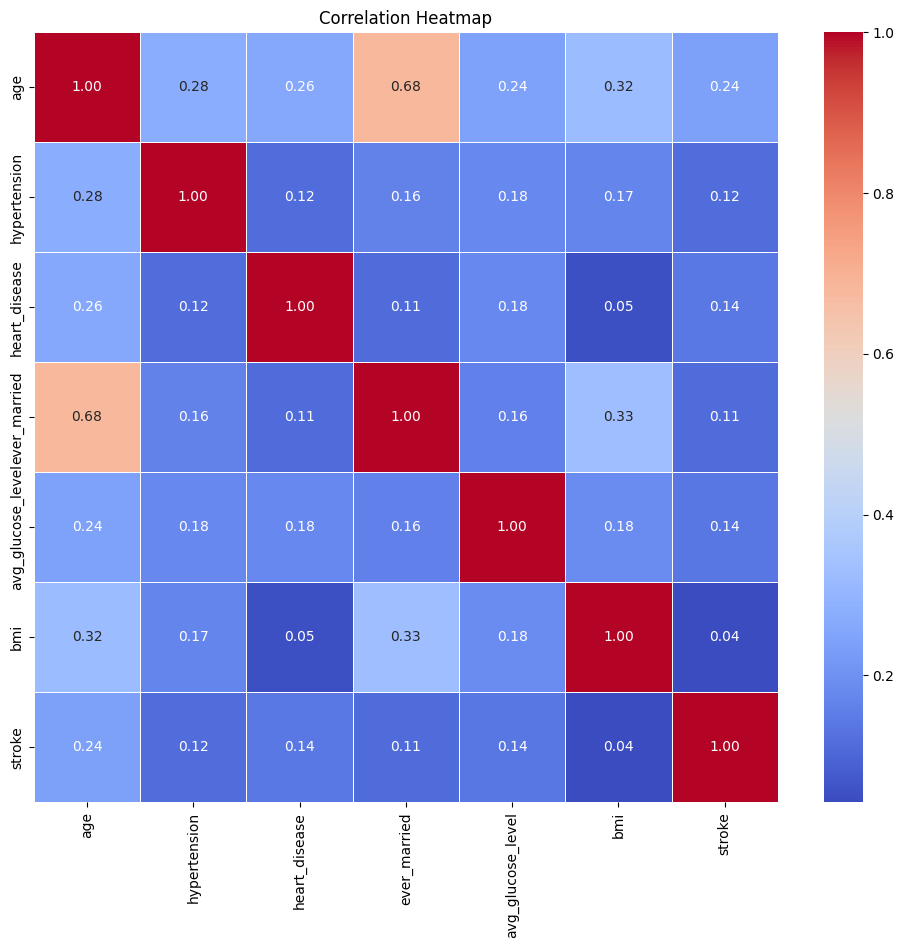

In [223]:
# 4c. Find out which input features are the most important
# Hint: Start out with df.corr(). Can visualise with seaborn library
numeric_columns = df.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(12, 10))
## this means basically that the color mapping will be cooler for lesser correlation and warmer for higher corr
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [224]:
df1.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,gender_Male,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,Residence_type_Urban,ever_married_Yes
age,1.000000,0.275327,0.261471,0.242380,0.314109,0.237204,0.136213,-0.070557,0.112339,0.320555,-0.632633,-0.017225,-0.375055,0.231008,0.125461,0.068744,-0.006026,0.679207
hypertension,0.275327,1.000000,0.116322,0.179515,0.164122,0.115818,0.010287,-0.019338,0.000485,0.112814,-0.129791,0.026865,-0.144178,0.060389,0.076883,0.017709,-0.007654,0.163954
heart_disease,0.261471,0.116322,1.000000,0.179941,0.047093,0.140256,0.000612,-0.014084,0.003946,0.080684,-0.091372,0.082537,-0.064699,0.062927,-0.017331,0.039895,0.012146,0.111420
avg_glucose_level,0.242380,0.179515,0.179941,1.000000,0.177934,0.138287,0.010688,-0.018329,0.016440,0.067459,-0.104379,0.051114,-0.103748,0.054997,0.035368,0.027383,-0.005424,0.160916
bmi,0.314109,0.164122,0.047093,0.177934,1.000000,0.038801,0.076352,-0.013636,0.201345,0.069523,-0.440685,-0.016805,-0.257697,0.097460,0.104027,0.087094,-0.008081,0.322168
stroke,0.237204,0.115818,0.140256,0.138287,0.038801,1.000000,0.007311,-0.013299,0.009006,0.059603,-0.082603,0.002878,-0.050910,0.056969,-0.005248,0.012452,0.014592,0.112624
work_type_Govt_job,0.136213,0.010287,0.000612,0.010688,0.076352,0.007311,1.000000,-0.022582,-0.443774,-0.169947,-0.151566,-0.019937,-0.101683,0.036764,0.039287,0.038474,0.014912,0.137697
work_type_Never_worked,-0.070557,-0.019338,-0.014084,-0.018329,-0.013636,-0.013299,-0.022582,1.000000,-0.067548,-0.025868,-0.023070,0.010267,0.015998,-0.026584,0.024301,-0.025122,0.032006,-0.080565
work_type_Private,0.112339,0.000485,0.003946,0.016440,0.201345,0.009006,-0.443774,-0.067548,1.000000,-0.508358,-0.453376,-0.016512,-0.200729,0.022958,0.097998,0.100215,-0.020216,0.145486
work_type_Self-employed,0.320555,0.112814,0.080684,0.067459,0.069523,0.059603,-0.169947,-0.025868,-0.508358,1.000000,-0.173624,-0.028999,-0.110847,0.088813,0.044973,-0.011554,0.003240,0.191583


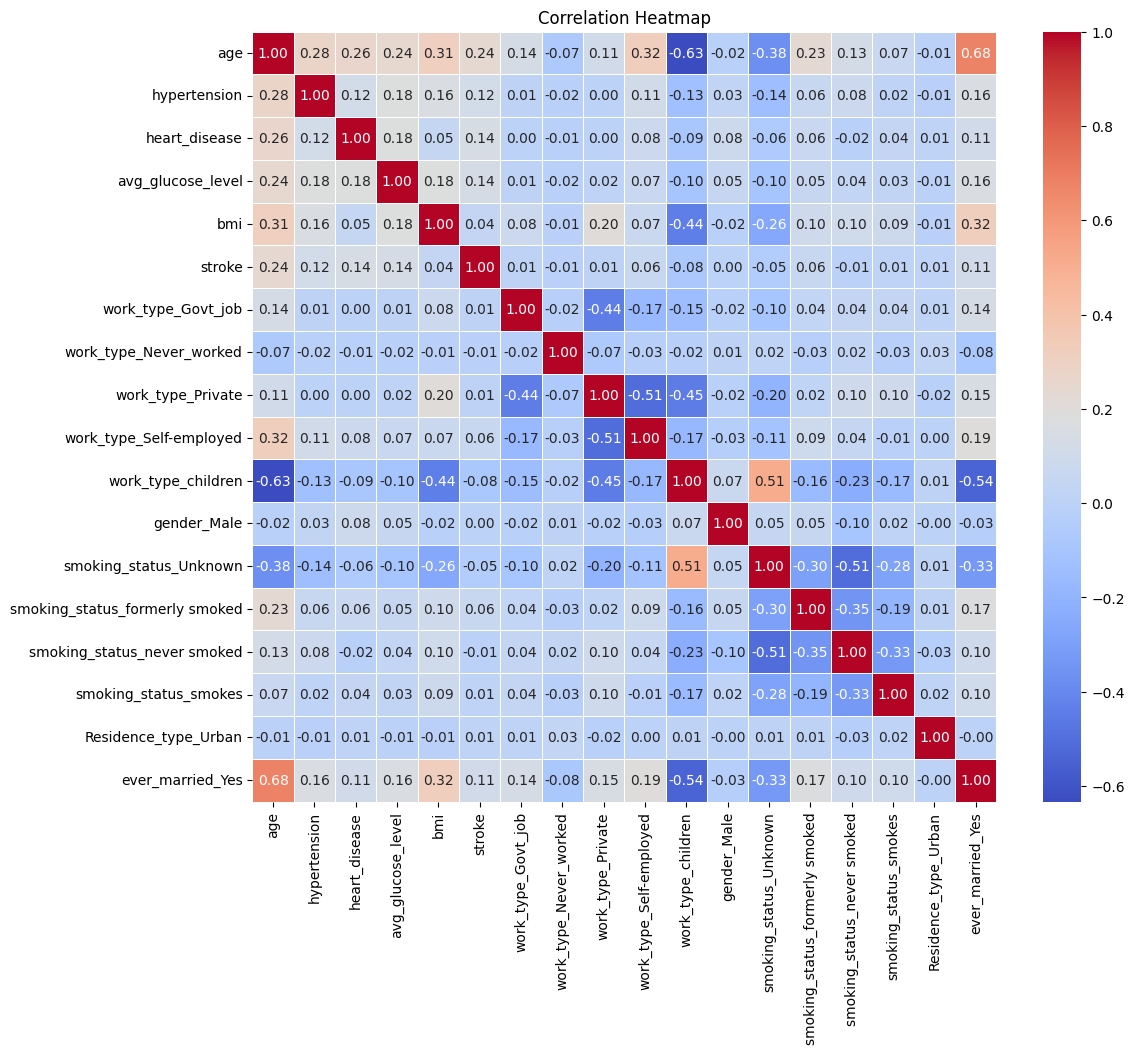

In [225]:
# Calculate the correlation matrix
correlation_matrix = df1.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

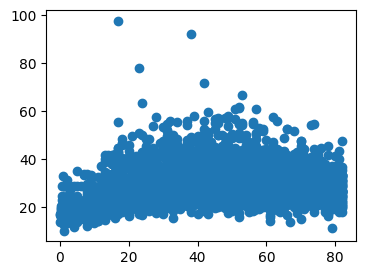

In [226]:
## Lets check the correlation between some of the individual features that we have with our target outcome
## the stroke feature, for a more clear and visual comparison 
plt.figure(figsize = (4,3))
plt.scatter(df1.age, df1.bmi)
plt.show()

Hence we can clearly see that the stroke possibility has a significant higher possibility as we grow older

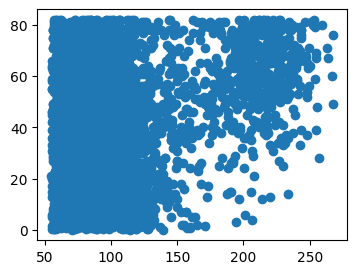

In [227]:
plt.figure(figsize=(4,3))
plt.scatter(df1.avg_glucose_level, df1.age)
plt.show()

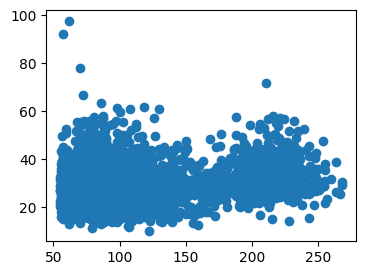

In [228]:
plt.figure(figsize=(4,3))
plt.scatter(df1.avg_glucose_level, df1.bmi)
plt.show()

****##Hence as itr is clearly visible that there is no clear cut conclusion that can be drawn ##****from the correlation visualization between these parameters

In [229]:
df1.shape

(4087, 18)

In [230]:
df1['stroke'].value_counts()

stroke
0    3887
1     200
Name: count, dtype: int64

**Hence as we can clearly see that there is a massive imbalance in the dataset that we are dealing with, without anykind of undersampling of the majority representation or oversampling of minority data, the model is bound to bnuild an unweanted bias towards the No Stroke cases**

Data Normalization is crucial for ensuring that all features contribute uniformly to machine learning models, preventing attributes with larger scales from disproportionately influencing the training process.

In [231]:
numerical_columns

['age', 'avg_glucose_level', 'bmi']

In [232]:
print(df1[['age', 'avg_glucose_level', 'bmi']].describe())

               age  avg_glucose_level          bmi
count  4087.000000        4087.000000  4087.000000
mean     43.147590         106.089063    28.938660
std      22.560521          45.314855     7.783641
min       0.080000          55.120000    10.300000
25%      25.000000          77.285000    23.850000
50%      45.000000          91.850000    28.400000
75%      61.000000         114.015000    32.800000
max      82.000000         267.760000    97.600000


In [233]:
# 3. Data Normalisation: Bring into the range 0 to 1, or -1 to 1
std_scaler = MinMaxScaler()


In [234]:
df1[['age', 'avg_glucose_level', 'bmi']] = std_scaler.fit_transform(df1[['age', 'avg_glucose_level', 'bmi']])

In [235]:
df1.head(10)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,gender_Male,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,Residence_type_Urban,ever_married_Yes
0,0.572754,0,0,0.041667,0.189003,0,0,0,1,0,0,1,0,0,0,1,1,1
1,0.658203,0,0,0.146445,0.284078,0,0,0,1,0,0,1,0,1,0,0,1,1
2,0.035645,0,0,0.062171,0.088202,0,0,0,0,0,1,0,1,0,0,0,0,0
3,0.755859,0,0,0.805399,0.424971,0,0,0,1,0,0,0,0,0,1,0,0,1
4,0.328613,0,0,0.143341,0.127148,0,0,0,1,0,0,0,1,0,0,0,0,1
5,0.475098,0,0,0.515190,0.269187,0,0,0,1,0,0,1,1,0,0,0,1,1
6,0.572754,0,0,0.658014,0.403207,0,0,0,1,0,0,0,0,0,1,0,0,1
7,0.020996,0,0,0.461766,0.077892,0,0,0,0,0,1,1,1,0,0,0,1,0
8,0.499512,0,0,0.231471,0.229095,0,0,0,1,0,0,1,1,0,0,0,1,1
9,0.572754,0,0,0.062829,0.126002,0,0,0,1,0,0,0,0,0,1,0,1,1


In [236]:
df1.shape

(4087, 18)

As we can clearly see that the numerical features like BMI, Age, Avg_glucose_level have been regularized

### Model Development

In [237]:
# 1. Divide dataframe into input and output
# X = df.drop(columns=['output_class']) -> Drop the column to be predicted
# y = df['output_class'] -> Choose Output column to be predicted
X_train = df1.drop(columns = ['stroke'])
Y_train = df1['stroke']

In [238]:
X_train.head(5)

,age,hypertension,heart_disease,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,gender_Male,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,Residence_type_Urban,ever_married_Yes
0,0.572754,0,0,0.041667,0.189003,0,0,1,0,0,1,0,0,0,1,1,1
1,0.658203,0,0,0.146445,0.284078,0,0,1,0,0,1,0,1,0,0,1,1
2,0.035645,0,0,0.062171,0.088202,0,0,0,0,1,0,1,0,0,0,0,0
3,0.755859,0,0,0.805399,0.424971,0,0,1,0,0,0,0,0,1,0,0,1
4,0.328613,0,0,0.143341,0.127148,0,0,1,0,0,0,1,0,0,0,0,1


In [239]:
X_train.shape

(4087, 17)

In [240]:
Y_train.head(5)

0    0
1    0
2    0
3    0
4    0
Name: stroke, dtype: int64

In [241]:
Y_train.shape

(4087,)

In [242]:
Y_train.value_counts()

stroke
0    3887
1     200
Name: count, dtype: int64

In [243]:
X_train.head(10)

,age,hypertension,heart_disease,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,gender_Male,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,Residence_type_Urban,ever_married_Yes
0,0.572754,0,0,0.041667,0.189003,0,0,1,0,0,1,0,0,0,1,1,1
1,0.658203,0,0,0.146445,0.284078,0,0,1,0,0,1,0,1,0,0,1,1
2,0.035645,0,0,0.062171,0.088202,0,0,0,0,1,0,1,0,0,0,0,0
3,0.755859,0,0,0.805399,0.424971,0,0,1,0,0,0,0,0,1,0,0,1
4,0.328613,0,0,0.143341,0.127148,0,0,1,0,0,0,1,0,0,0,0,1
5,0.475098,0,0,0.515190,0.269187,0,0,1,0,0,1,1,0,0,0,1,1
6,0.572754,0,0,0.658014,0.403207,0,0,1,0,0,0,0,0,1,0,0,1
7,0.020996,0,0,0.461766,0.077892,0,0,0,0,1,1,1,0,0,0,1,0
8,0.499512,0,0,0.231471,0.229095,0,0,1,0,0,1,1,0,0,0,1,1
9,0.572754,0,0,0.062829,0.126002,0,0,1,0,0,0,0,0,1,0,1,1


## Now since our dataset is highly imbalanced we have to perform some countering procedures to handle the mis-representation, and here we will be using SMOTE (Synthetic Minority Over-Sampling Technique).

SMOTE (Synthetic Minority Over-sampling Technique) is a method for addressing class imbalance in machine learning by generating synthetic examples of the minority class to balance the class distribution.

In [244]:
smote = SMOTE(random_state = 42)
smote_X_train, smote_Y_train = smote.fit_resample(X_train,Y_train)


In [245]:
from collections import Counter
## Lets check the class distribution in the dataset before and after sampling
print("Before sampling class distribuion: ", Counter(Y_train))
print("After Sampling class distribution: ", Counter(smote_Y_train))

Before sampling class distribuion:  Counter({0: 3887, 1: 200})
After Sampling class distribution:  Counter({0: 3887, 1: 3887})


So now we can clearly see that there has been a significant re-balncing of the output parameter in here and that we are able retain all the information of the the majority class output without the need to undersample it, at the same time generate a significant amount of synthesized data to encounter the imbalanced representation of the output class.

In [246]:
# 2. Perform Feature Selection - Experiment with the best one!
feat_selector = SelectKBest(mutual_info_classif, k=7)
X = feat_selector.fit_transform(smote_X_train, smote_Y_train)
chosen_features = feat_selector.get_feature_names_out()


In [247]:
chosen_features

array(['age', 'heart_disease', 'avg_glucose_level', 'bmi',
       'work_type_children', 'smoking_status_formerly smoked',
       'ever_married_Yes'], dtype=object)

Living the feature selection part for later at first lets just build a model and later on we will see what we can do

In [248]:
# Build a simple neural network
model = Sequential()
model.add(Dense(32, input_dim=smote_X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(smote_X_train, smote_Y_train, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
243/243 [==============================] - 1s 2ms/step - loss: 0.6077 - accuracy: 0.6656
Epoch 2/50
243/243 [==============================] - 0s 2ms/step - loss: 0.5006 - accuracy: 0.7650
Epoch 3/50
243/243 [==============================] - 0s 2ms/step - loss: 0.4546 - accuracy: 0.8027
Epoch 4/50
243/243 [==============================] - 0s 2ms/step - loss: 0.4310 - accuracy: 0.8101
Epoch 5/50
243/243 [==============================] - 0s 2ms/step - loss: 0.4181 - accuracy: 0.8146
Epoch 6/50
243/243 [==============================] - 0s 2ms/step - loss: 0.4087 - accuracy: 0.8202
Epoch 7/50
243/243 [==============================] - 0s 2ms/step - loss: 0.3992 - accuracy: 0.8226
Epoch 8/50
243/243 [==============================] - 0s 2ms/step - loss: 0.3934 - accuracy: 0.8253
Epoch 9/50
243/243 [==============================] - 1s 2ms/step - loss: 0.3892 - accuracy: 0.8302
Epoch 10/50
243/243 [==============================] - 0s 2ms/step - loss: 0.3840 - accuracy: 0.8319

In [249]:
 Define the LightGBM Classifier
lgbm_classifier = LGBMClassifier()
#Define the CatBoost Classifier
catboost_classifier = CatBoostClassifier()
# Define the Logistic Regression model
logistic_regression = LogisticRegression()


# Define the hyperparameters to search
param_grid = {
    #'C': [0.0001, 0.001, 0.01, 0.1, 1, 25, 10, 50,100,150],
    #'penalty': ['l1', 'l2'],
    #'solver': ['liblinear', 'saga']
}
# Create GridSearchCV object
grid_search = GridSearchCV(estimator=logistic_regression, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model using RandomizedSearchCV
grid_search.fit(smote_X_train, smote_Y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best parameters
print("Best Hyperparameters:", best_params)

In [250]:
# Fit the best model on the entire training set
#best_model.fit(smote_X_train, smote_Y_train)

In [251]:
# Define the hyperparameter distribution for XGBoost
#param_dist = {
    #'n_estimators': randint(50, 200),
    #'max_depth': randint(3, 10),
    #'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
    #'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    #'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    #'gamma': [0, 1, 2, 3, 4],
    #'min_child_weight': [1, 2, 3, 4],
#}

# Create the XGBoost model
#xgb_model = XGBClassifier()

# Create RandomizedSearchCV object
#randomized_search = RandomizedSearchCV(xgb_model, param_dist, n_iter=10, cv=5)

# Fit to data
#randomized_search.fit(smote_X_train, smote_Y_train)

# Access best parameters
#best_params = randomized_search.best_params_


In [252]:
#best_params = randomized_search.best_params_

# Create a new XGBoost model with the best parameters
#best_xgb_model = XGBClassifier(
    #n_estimators=best_params['n_estimators'],
    #max_depth=best_params['max_depth'],
    #learning_rate=best_params['learning_rate'],
    #subsample=best_params['subsample'],
    #colsample_bytree=best_params['colsample_bytree'],
    #gamma=best_params['gamma'],
    #min_child_weight=best_params['min_child_weight']
#)

# Fit the model to your training data
#best_xgb_model.fit(smote_X_train, smote_Y_train)

In [253]:
# 4. Choose Model(s), fit
### Experiment with different models.
### https://scikit-learn.org/stable/supervised_learning.html


## creating a logisitc regression model
logreg_model = LogisticRegression()
# Fit the model to the training data
logreg_model.fit(smote_X_train, smote_Y_train)

#Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=120, max_depth=6)
## the N-estimators is used for mentioning the number of decision trees that would be build for the process
## the random_state parameter is used to ensure reproducibility of results

# Fit the model on the balanced training data
rf_classifier.fit(smote_X_train, smote_Y_train)


In [254]:
# 6. After model choice is made, fine-tune with GridSearchCV, or RandomizedSearchCV()


# Defining the hyperparameter distribution


******After doing Randomized Search CV and obtaining the optimum n_estimators and max_depth we will be applying those in our Random Forest Classifier model******

In [255]:
rf_classifier = RandomForestClassifier(n_estimators=70, max_depth=10)

rf_classifier.fit(smote_X_train, smote_Y_train)

# Model Prediction/ Testing
## Now that we are done with the Model Building stage, we can finally go to test the Classification Model

In [256]:
# Creating output file for submission - Template Code

test_pd = pd.read_csv('/kaggle/input/stroke-test-dataset/stroke_test_set_nogt.csv')

# saving in a new variable to modify
test = test_pd.copy(deep=True)
## changes made in 'test' doesnt affect 'test_pd'

In [257]:
test_pd.shape

(1022, 10)

In [258]:
# Prepare data to be given as an input to your trained model
# 1. Repeat the pre-processing done above. Eg: Conversion to categorical, filling in mean values
#test = test.drop(columns=["ever_married"])
test['bmi'].fillna(test['bmi'].mean(), inplace=True)


In [259]:
test = pd.get_dummies(test, columns=['work_type'], dtype=int)

In [260]:
test.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,Male,80.0,0,1,Yes,Rural,105.92,32.5,never smoked,0,0,1,0,0
1,Male,75.0,1,0,Yes,Urban,221.29,25.8,smokes,0,0,1,0,0
2,Female,60.0,0,0,No,Urban,89.22,37.8,never smoked,0,0,1,0,0
3,Female,72.0,1,0,Yes,Rural,74.63,23.1,formerly smoked,0,0,1,0,0
4,Male,81.0,0,0,Yes,Urban,99.33,33.7,never smoked,0,0,0,1,0


In [261]:
## Converting the smoking status into numerical value
test = pd.get_dummies(test, columns=['gender'], drop_first=True, dtype=int)

In [262]:
test.head()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,gender_Male
0,80.0,0,1,Yes,Rural,105.92,32.5,never smoked,0,0,1,0,0,1
1,75.0,1,0,Yes,Urban,221.29,25.8,smokes,0,0,1,0,0,1
2,60.0,0,0,No,Urban,89.22,37.8,never smoked,0,0,1,0,0,0
3,72.0,1,0,Yes,Rural,74.63,23.1,formerly smoked,0,0,1,0,0,0
4,81.0,0,0,Yes,Urban,99.33,33.7,never smoked,0,0,0,1,0,1


In [263]:
test['gender_Male'].value_counts()

gender_Male
0    598
1    424
Name: count, dtype: int64

In [264]:
test = pd.get_dummies(test, columns=['smoking_status'], dtype=int)

In [265]:
test = pd.get_dummies(data = test, columns = ['Residence_type'], drop_first=True, dtype = int) 

In [266]:
test = pd.get_dummies(test, columns=['ever_married'], drop_first=True, dtype=int)

In [267]:
test.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,gender_Male,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,Residence_type_Urban,ever_married_Yes
0,80.0,0,1,105.92,32.5,0,0,1,0,0,1,0,0,1,0,0,1
1,75.0,1,0,221.29,25.8,0,0,1,0,0,1,0,0,0,1,1,1
2,60.0,0,0,89.22,37.8,0,0,1,0,0,0,0,0,1,0,1,0
3,72.0,1,0,74.63,23.1,0,0,1,0,0,0,0,1,0,0,0,1
4,81.0,0,0,99.33,33.7,0,0,0,1,0,1,0,0,1,0,1,1


In [268]:
std_scaler.fit(test)

MinMaxScaler()

In [269]:
test[['age', 'avg_glucose_level', 'bmi']] = std_scaler.fit_transform(test[['age', 'avg_glucose_level', 'bmi']])

In [270]:
test.shape

(1022, 17)

In [271]:
test.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,gender_Male,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,Residence_type_Urban,ever_married_Yes
0,0.975562,0,1,0.234017,0.393996,0,0,1,0,0,1,0,0,1,0,0,1
1,0.914467,1,0,0.766953,0.268293,0,0,1,0,0,1,0,0,0,1,1,1
2,0.731183,0,0,0.156874,0.493433,0,0,1,0,0,0,0,0,1,0,1,0
3,0.877810,1,0,0.089477,0.217636,0,0,1,0,0,0,0,1,0,0,0,1
4,0.987781,0,0,0.203575,0.416510,0,0,0,1,0,1,0,0,1,0,1,1


In [272]:
# Make predictions on new data
y_pred_prob = model.predict(test)
y_pred = (y_pred_prob > 0.5).astype(int)

32/32 [==============================] - 0s 1ms/step


In [273]:
# Convert to a one-dimensional array
y_pred = y_pred.ravel()

In [274]:
## Predicting the final outcome of the logisitc Regression model
#y_pred = best_model.predict(test)

In [96]:
y_pred[:30]

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1])

# Finally lets find out how our model actually performed in the actual test with the help of some actual metrics

In [522]:
# 5. Evaluate with relevant metric for your problem. Eg: accuracy_score(), r2_score()


### Testing and Creating Output CSV

In [116]:
# Creating output file for submission - Template Code

#test_pd = pd.read_csv('/kaggle/input/test-imdb/test_data_with_inputs.csv')

# saving in a new variable to modify
#test = test_pd.copy(deep=True)



#test['bmi'].fillna(test['bmi'].mean(), inplace=True)
##test = pd.get_dummies(test)

# 2. Use the same features obtained in feature selection
##chosen_features = feat_selector.get_feature_names_out() # from above -> getting names of chosen features
##test = test[chosen_features]

# 3. Normalise/Scale the features as done above


# 4. Predict and obtain results from the model
##y_pred = model.predict(test)



In [275]:
# 5. Save results to CSV
submission = pd.DataFrame({'ID': test.index, 'stroke' : y_pred})
submission.to_csv('SD_26_output_submission_eval.csv', index=False)